In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.formula.api as smfa
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

In [5]:
cats_df = pd.read_csv('data/cats.csv')
cats_df.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [6]:
mu = 2.6
ss.shapiro(cats_df['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [7]:
ss.wilcoxon(cats_df['Bwt'] - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [10]:
ss.ttest_1samp(cats_df['Bwt'], popmean=mu, alternative='two-sided')

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)

In [12]:
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data_df = pd.DataFrame(data)
data_df.head()

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2


In [13]:
ss.ttest_rel(data_df['before'], data_df['after'], alternative='two-sided')

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

In [15]:
ss.shapiro(data_df['before']), ss.shapiro(data_df['after'])

(ShapiroResult(statistic=0.9644594192504883, pvalue=0.8352694511413574),
 ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687))

In [16]:
female = cats_df.loc[cats_df['Sex'] == 'F', 'Bwt']
male = cats_df.loc[cats_df['Sex'] == 'M', 'Bwt']

In [17]:
ss.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [18]:
ss.ttest_ind(female, male, alternative='two-sided', equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

(47, 97)

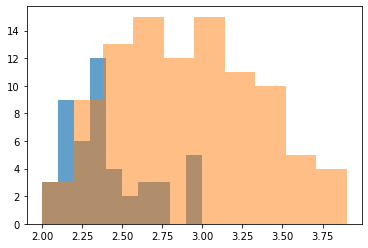

In [24]:
plt.hist(female, alpha=0.7)
plt.hist(male, alpha=0.5)
len(female), len(male)

In [29]:
iris_df = pd.read_csv('data/iris.csv')
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
iris_df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
target_list = iris_df['target'].unique()
setosa = iris_df.loc[iris_df['target'] == 'Iris-setosa', 'sepal width']
versicolor = iris_df.loc[iris_df['target'] == 'Iris-versicolor', 'sepal width']
virginica = iris_df.loc[iris_df['target'] == 'Iris-virginica', 'sepal width']

<AxesSubplot:xlabel='target', ylabel='sepal width'>

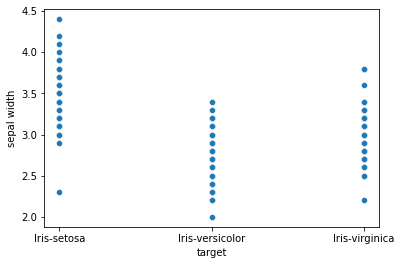

In [34]:
sns.scatterplot(data=iris_df, x='target', y='sepal width')

In [35]:
ss.shapiro(setosa), ss.shapiro(versicolor), ss.shapiro(virginica)

(ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427),
 ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507),
 ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896))

In [36]:
ss.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [38]:
ss.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

In [41]:
mc = MultiComparison(data=iris_df['sepal width'], groups=iris_df['target'])
mc.tukeyhsd(alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


In [42]:
ss.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [43]:
pg.welch_anova(data=iris_df, dv='sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


In [44]:
mt_df = pd.read_csv('data/mtcars.csv')
mt_df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [50]:
formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = smfa.ols(formula=formula, data=mt_df).fit()

In [49]:
aov_table = anova_lm(model, typ=2).round(3)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.401,2.0,24.819,0.000
C(am),36.767,1.0,3.999,0.056
C(cyl):C(am),25.437,2.0,1.383,0.269
Residual,239.059,26.0,NaN,NaN


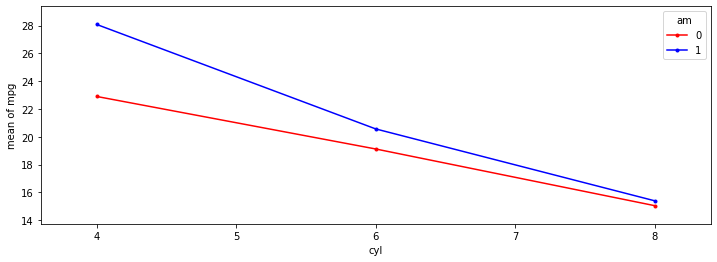

In [54]:
cyl = mt_df['cyl']
am = mt_df['am']
mpg = mt_df['mpg']
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
fig = interaction_plot(cyl, am, mpg, colors=['red', 'blue'], ax=ax)

In [55]:
tit_df = pd.read_csv('data/titanic.csv')
tit_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton


In [69]:
obs = tit_df[tit_df['survived'] == 1]['sex'].value_counts().reindex(['female', 'male'])
exp = tit_df['sex'].value_counts(normalize=True).reindex(['female', 'male']).mul(obs.sum())
obs, exp

(female    233
 male      109
 Name: sex, dtype: int64,
 female    120.525253
 male      221.474747
 Name: sex, dtype: float64)

In [76]:
ss.chisquare(f_obs=obs, f_exp=exp)

Power_divergenceResult(statistic=162.08166685161612, pvalue=3.970516389658729e-37)

In [77]:
table = pd.crosstab(tit_df['class'], tit_df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [79]:
chi2, p, ddof, exp_table = ss.chi2_contingency(table)
chi2, p, ddof, exp_table

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [80]:
house_df = pd.read_csv('data/kc_house_data.csv')
house_df[['price', 'sqft_living']].corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [81]:
formula = 'price ~ sqft_living'
model = smfa.ols(formula=formula, data=house_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:47:59   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

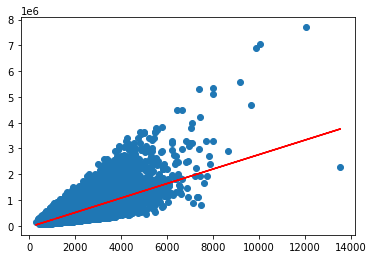

In [85]:
plt.scatter(x=house_df['sqft_living'], y=house_df['price'])
plt.plot(house_df['sqft_living'], model.predict(house_df['sqft_living']), color='red')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

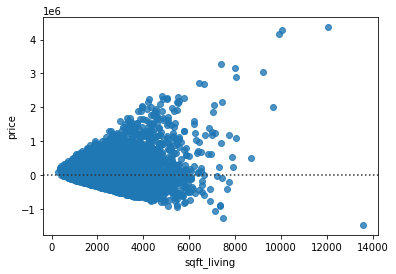

In [86]:
sns.residplot(data=house_df, x='sqft_living', y='price')